# LABORATORIO1:  Regresión Lineal Multiple

## Regresión lineal múltiple

Se utiliza la regresion lineal multiple para predecir el precio de barcos de motor y de velo. El dataset `/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt` contiene las siguientes características (features).
Columna1 - X1 : Año de fabricación del barco
Columna2 - X2: Largo del barco en pies
Columna3 - X3: Ancho del barco en pies
Columna4 - X4: Cantidad de motores del barco
Columna5 - X5: Potencia del barco en HP
Columna6 - y: Precio del Barco en Dólares

### 1. Bibliotecas a utilizar en las regresiones

In [104]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 2. Se otorga permisos de acceso a la carpeta de Drive para leer el dataset

In [105]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 3. Desde el directorio del Drive se carga el dataset y se imprimen 15 ejemplos para verificar que los datos estén en orden.

In [106]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'Boats_Cleaned_dataset.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=',')
X = data[:, :5]
y = data[:, 5]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'y'))
print('-'*126)
for i in range(15):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], y[i]))

18052
  X[:,0] X[:, 1]   X[:, 2] X[:, 3] X[:, 4]         y
------------------------------------------------------------------------------------------------------------------------------
    1992      21       8       1     150     16500
    2018      40      11       2     800    539000
    2020      18       7       1      75     26995
    2015      32      10       2     600    169995
    1994      44      15       2     700    109900
    2019      43      14       2     800    625000
    2019      46      14       2    1100    949000
    2019      50      20       2    1340   1349000
    2009     103      23       2    3650   3299000
    1971      42      14       2     840     59500
    1979      43      14       2     900     79500
    1986      30      11       1       0     25500
    2019      24       8       1     200     44507
    2000      55      16       2       0    299000
    1989      30      11       1      18     31000


## 4. Normalización de las características
En la impresión anterior se observa que los datos tienen diferentes magnitudes.
Con la normalización se va a transformar cada una de las características para que los datos esten en una sola escala. De esta forma se podrá converger más rápidamente.
Se aplica la ecuación: X_norm = (X -mu) / sigma

In [107]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

## 5. Se va a imprimir los valores normalizados
Se imprime los valores normalizados de las características.
Asimismo los valores medios y la desviación estandar utilizados para la normalización de datos.

In [108]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.992e+03 2.100e+01 8.500e+00 1.000e+00 1.500e+02]
 [2.018e+03 4.000e+01 1.100e+01 2.000e+00 8.000e+02]
 [2.020e+03 1.800e+01 7.420e+00 1.000e+00 7.500e+01]
 ...
 [1.973e+03 2.900e+01 1.613e+01 1.000e+00 0.000e+00]
 [2.013e+03 1.933e+01 8.000e+00 1.000e+00 0.000e+00]
 [2.002e+03 2.658e+01 9.420e+00 1.000e+00 2.200e+02]]
Media calculada: [2.01341962e+03 2.37151800e+01 1.63144233e+01 1.11976512e+00
 1.12867760e+02]
Desviación estandar calculada: [ 10.26290881  13.94435393  28.79966571   0.36515857 286.14974242]
[[-2.08709066 -0.19471537 -0.27133729 -0.32798114  0.12976507]
 [ 0.44630416  1.16784328 -0.18453073  2.41055515  2.40130302]
 [ 0.64118069 -0.40985621 -0.30883773 -0.32798114 -0.13233547]
 ...
 [-3.93841764  0.37899353 -0.00640366 -0.32798114 -0.394436  ]
 [-0.04088715 -0.3144771  -0.28869861 -0.32798114 -0.394436  ]
 [-1.11270803  0.20544659 -0.23939248 -0.32798114  0.37439223]]


## 6. Después de normalizar, se agrega la característica X0 = 1 para todos los ejemplos.
Se imprime para verificar que se agregó X0 como primera característica.

In [109]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [79]:
print(X)

[[ 1.         -2.08709066 -0.19471537 -0.27133729 -0.32798114  0.12976507]
 [ 1.          0.44630416  1.16784328 -0.18453073  2.41055515  2.40130302]
 [ 1.          0.64118069 -0.40985621 -0.30883773 -0.32798114 -0.13233547]
 ...
 [ 1.         -3.93841764  0.37899353 -0.00640366 -0.32798114 -0.394436  ]
 [ 1.         -0.04088715 -0.3144771  -0.28869861 -0.32798114 -0.394436  ]
 [ 1.         -1.11270803  0.20544659 -0.23939248 -0.32798114  0.37439223]]


### 7. Cálculo de la función de costo J



In [110]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


## 8. Cálculo de valores de Theta mediante el descenso por el gradiente.
Se aplica el descenso por el gradiente con el objetivo de minimizar el valor de J (costo).
En nuestro caso: J (Theta0, Theta1, Theta2, Theta3, Theta4, Theta5)

In [111]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 9. Selección de coeficientes de aprendizaje Alpha
Se debe tener cuidado en la selección de los valores de Alpha.
-Si Alpha es muy pequeño, el descenso por el gradiente será lento.
-Si Alpha es muy grande, en el descenso por el gradiente puede presentarse el mínimo y falla su propósito de converger a un mínimo global.
#### Gráfico número de iteraciones vs. costo
Se grafica para visualizar cómo varía el costo J en función del número de iteraciones que utilizamos. A mayor número de iteraciones se reduce el valor del costo (Mean squared error).
#### Predicción del valor de y
Para valores dados de las características se predice el valor de y (Precio del Barco) con lo cual concluye la regresión mediante el descenso por el gradiente.

theta calculado por el descenso por el gradiente: [ 64589.9509701   23336.66592533  33886.54480246   9921.34861367
    243.66147486 108467.03121042]
El precio predecido del Barco (usando el descenso por el gradiente): $20589


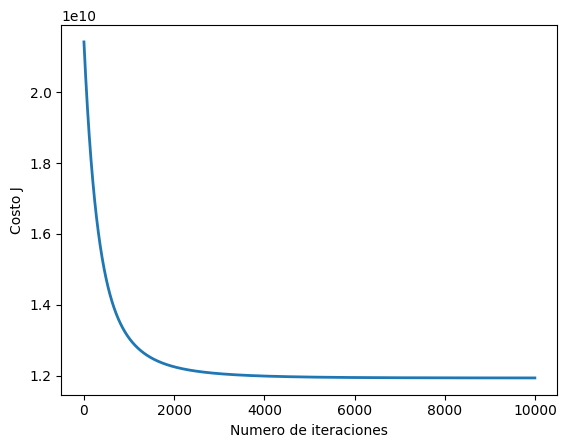

In [112]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio de un barco donde: Año de fabricación=1992, Largo=21 ft, Ancho=8.5 ft, CantidadMotores=1, Potencia=150 HP
X_array = [1, 1992, 21, 8.5, 1, 150]
X_array[1:6] = (X_array[1:6] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido del Barco (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [113]:
X_array = [1, 1992, 23, 9.5, 1, 180]
X_array[1:6] = (X_array[1:6] - mu) / sigma

In [114]:
X_array[1:6]

[-2.087090657139544,
 -0.05128814423484148,
 -0.23661466773391754,
 -0.32798113557411496,
 0.23460527913825205]


### 10. Aplicación de la Ecuacion de la Normal

Se utiliza para calcular rapidamente el modelo de una regresion lineal.

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Para aplicar ésta ecuación se debe cumplir 3 requisitos:
1. El número de ejemplos debe ser mayor al número de características:
m > n
2.Que las características no estén repetidas
3. La cantidad de datos no debe ser grande:  m < 10000. Ésto por la capacidad de cómputo. En nuestro caso se ha probado que sí funciona para los cerca de 18000 ejemplos.

In [115]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=',')
X = data[:, :5]
y = data[:, 5]
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

18052


In [116]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

### 11. Predicción del valor de y (Costo del Barco)

In [117]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio de un barco donde: Año de fabricación=1992, Largo=21 ft, Ancho=8.5 ft, CantidadMotores=1, Potencia=150 HP

X_array = [1, 1992, 21, 8.5, 1, 150]
price = np.dot(X_array, theta)

print('Precio predecido del Barco (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-4.56692508e+06  2.24913213e+03  2.42506148e+03  3.46066193e+02
 -3.01692749e+03  3.83570965e+02]
Precio predecido del Barco (usando la ecuación de la normal): $21733


#### Se observa que el valor predecido del Costo del Barco es correcto.

# LABORATORIO1: Regresión Polinomial

### 1. Normalización de Características

In [118]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'Boats_Cleaned_dataset(1)'), delimiter=',')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'Boats_Cleaned_dataset(1)'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=",")
#print(data)
X = data[:, :5]
y = data[:, 5]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format(X, y))
#print('-'*126)
for i in range(20):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], y[i]))

    1992      21       8       1     150     16500
    2018      40      11       2     800    539000
    2020      18       7       1      75     26995
    2015      32      10       2     600    169995
    1994      44      15       2     700    109900
    2019      43      14       2     800    625000
    2019      46      14       2    1100    949000
    2019      50      20       2    1340   1349000
    2009     103      23       2    3650   3299000
    1971      42      14       2     840     59500
    1979      43      14       2     900     79500
    1986      30      11       1       0     25500
    2019      24       8       1     200     44507
    2000      55      16       2       0    299000
    1989      30      11       1      18     31000
    2017      35      11       2     760    323536
    2019      22       8       1     175     36900
    2019      20       8       1     115     22900
    2000      48      16       2    1320    325000
    1987      54      18       

In [119]:
X = np.concatenate([X, X * X], axis=1)

In [120]:
print(X)

[[1.992000e+03 2.100000e+01 8.500000e+00 ... 7.225000e+01 1.000000e+00
  2.250000e+04]
 [2.018000e+03 4.000000e+01 1.100000e+01 ... 1.210000e+02 4.000000e+00
  6.400000e+05]
 [2.020000e+03 1.800000e+01 7.420000e+00 ... 5.505640e+01 1.000000e+00
  5.625000e+03]
 ...
 [1.973000e+03 2.900000e+01 1.613000e+01 ... 2.601769e+02 1.000000e+00
  0.000000e+00]
 [2.013000e+03 1.933000e+01 8.000000e+00 ... 6.400000e+01 1.000000e+00
  0.000000e+00]
 [2.002000e+03 2.658000e+01 9.420000e+00 ... 8.873640e+01 1.000000e+00
  4.840000e+04]]


In [121]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [122]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

2. Añadir el término de interseccion X0 a X_norm:

In [123]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [124]:
print(X)

[[ 1.         -2.08709066 -0.19471537 ... -0.04771569 -0.28946136
  -0.10141107]
 [ 1.          0.44630416  1.16784328 ... -0.04544258  1.95318092
   0.76687283]
 [ 1.          0.64118069 -0.40985621 ... -0.04851739 -0.28946136
  -0.12513948]
 ...
 [ 1.         -3.93841764  0.37899353 ... -0.03895307 -0.28946136
  -0.13304894]
 [ 1.         -0.04088715 -0.3144771  ... -0.04810037 -0.28946136
  -0.13304894]
 [ 1.         -1.11270803  0.20544659 ... -0.04694696 -0.28946136
  -0.06499236]]


### 3. Descenso por el gradiente

In [125]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [126]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

### 4. Seleccionar coeficientes de aprendizaje

theta calculado por el descenso por el gradiente: [ 64592.86884611  10868.48886899  77663.36366438   5363.17457979
  38099.44628103 -46503.82322876  14569.67550181 -51551.54883638
  -4000.41316224  -7574.79605642 164151.21263383]
El costo del Barco (usando el descenso por el gradiente) es: $-29581


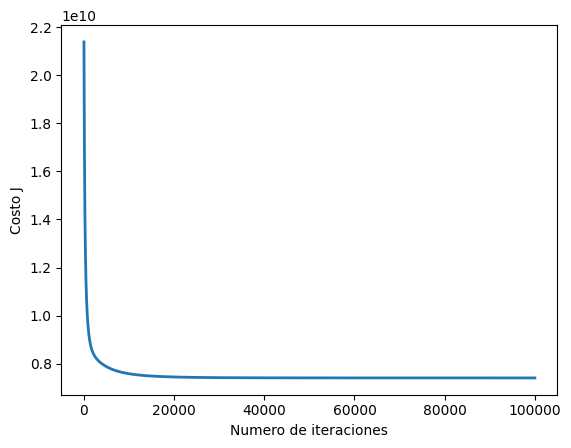

In [128]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [1, 1992, 21, 8.5, 1, 150, 3968064, 441, 72.25, 1, 22500]
X_array[1:11] = (X_array[1:11] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El costo del Barco (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

In [129]:
X_array = [1, 1992, 21, 8.5, 1, 150, 3968064, 441, 72.25, 1, 22500]
X_array[1:11] = (X_array[1:11] - mu) / sigma

In [130]:
X_array[1:11]
print(np.dot(X_array, theta))

-29581.191088280866


### 5. Aplicación de la Ecuación de la Normal

In [131]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/SIS 420/Lab1/Boats_Cleaned_dataset(1).txt', delimiter=",")
X = data[:, :5]
y = data[:, 5]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [132]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [133]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 1992, 21, 8.5, 1, 150, 3968064, 441, 72.25, 1, 22500]
price = np.dot(X_array, theta)

print('Precio del Barco (usando la ecuación de la normal) es: ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.71226388e+08 -1.73856723e+05  5.65091874e+03  1.78828353e+02
  1.19932048e+05 -1.62981299e+02  4.40663858e+01 -2.69467492e+01
 -1.73977127e-01 -9.31270863e+03  2.31221233e-01]
Precio del Barco (usando la ecuación de la normal) es: $-38297


#### Se observa que el valor predecido del costo del barco es negativo.
Se analizará nuevamente la regresión polinomial.